### Packages and Imports

In [1]:
import torch
import pandas as pd
import numpy as np

from datetime import datetime
from matplotlib import pyplot as plt

from utils.instruments import Stock, RiskFactor
from utils.data_handler import YahooDataHandler
from models.ar import AR
from models.garch import GARCH

%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])

### Financial Data

In [2]:
ydh = YahooDataHandler()

ticker = "GS"

# Start and end dates.
start = datetime.strptime("2005-05-01", r"%Y-%m-%d")
end = datetime.strptime("2023-06-01", r"%Y-%m-%d")

price_history = ydh.get_price_history(ticker, start, end)
identifier = f"{ticker}_RF"
risk_factor = RiskFactor(identifier, price_history)
stock = Stock(identifier=ticker, risk_factors=[risk_factor])

data = risk_factor.price_history.log_returns

[*********************100%***********************]  1 of 1 completed


In [3]:
ar_model = AR(data)
ar_model.calibrate()
print(ar_model.parameters)

[-0.05507330596446991, 0.0038955030031502247, 0.0003181590000167489, 0.022512583062052727]


In [4]:
ar_model.aic

tensor(-24765.1270)

In [5]:
ar_model.bic

tensor(-24739.4336)

In [6]:
garch_model = GARCH(data)
garch_model.calibrate()

In [35]:
torch.sqrt(garch_model._long_run_variance) * 100

tensor(2.2510)

tensor(0.0003)

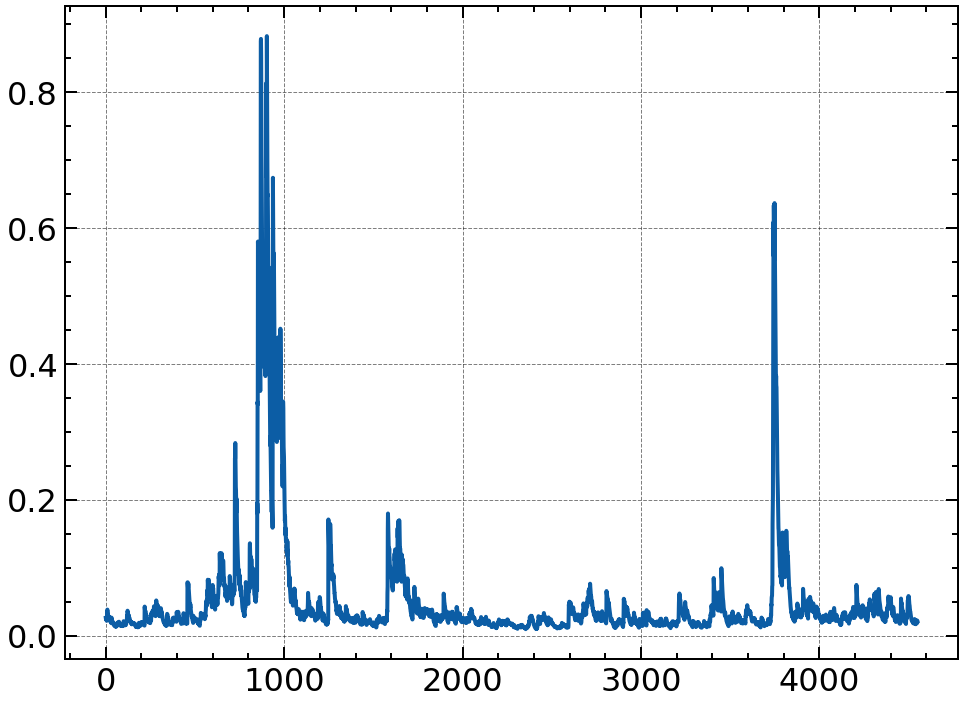

In [43]:
garch_model._solution
vol = garch_model._compute_variance(parameters=torch.tensor(garch_model._solution.x))
plt.plot(vol*100)
torch.sqrt(garch_model._initial_variance) * 100

In [8]:
garch_model._solution

      fun: -32102.430072461833
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.00799529e-05, -3.92028649e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 10
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([4.45567392, 2.47339131])

In [9]:
ar_model._log_likelihood

tensor(12386.5635)

In [10]:
torch.tensor([1,2]).numpy()

array([1, 2])

In [11]:
garch_model._solution.fun

-32102.430072461833

In [12]:
garch_model.aic

tensor(-23732.2500)

In [13]:
garch_model.bic

tensor(-23712.9805)

In [14]:
ar_model.bic

tensor(-24739.4336)

In [15]:
ar_model.aic

tensor(-24765.1270)

In [16]:
ar_model._log_likelihood

tensor(12386.5635)

In [17]:
garch_model._log_likelihood

tensor(11869.1250)

In [18]:
garch_model._solution.fun

-32102.430072461833

In [19]:
garch_model.transform_to_uniform()

tensor([0.4788, 0.8757, 0.2826,  ..., 0.9655, 0.4060, 0.1744])